In [1]:
import pandas as pd

# Read X,Y traces into pandas DataFrames named X,Y
X = pd.read_csv('X.csv')
Y = pd.read_csv('Y.csv')

In [2]:
# Producing training set and test set


# Here is how you can create a single frame with selected columns

X_features = ['runq-sz', '%%memused','proc/s','cswch/s','all_%%usr','ldavg-1','totsck','pgfree/s','plist-sz','file-nr','idel/s','tps']
XY = pd.concat([X[X_features], Y['DispFrames']], axis=1)


# Split XY into training set and test set of equal size

from sklearn.model_selection import train_test_split
train, test = train_test_split(XY, test_size = 0.3)

# Sort the train and test sets after index (which became unsorted through sampling)
train = train.sort_index(axis=0)
test = test.sort_index(axis=0)

# Extract X,Y components from test and train sets
#X_train = train[X_features]; 
#X_test = test[X_features]
Y_train = train['DispFrames']; Y_test = test['DispFrames']


In [7]:
import numpy as np
import itertools
from sklearn import linear_model
from tqdm import tnrange, tqdm_notebook
import time
X_train = train.drop(columns = 'DispFrames', axis = 1)

def fit_linear_reg(X,Y,X_test,Y_test):
    #Fit linear regression model and return RSS and R squared values
    start_time = time.time()
    model_k = linear_model.LinearRegression(fit_intercept = True)
    #start_time = float(time.time())
   
    model_k.fit(X,Y)
    #end_time = float(time.time())
    end_time = time.time()
    timec=end_time - start_time
    #RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    NMAE=np.mean(np.abs(model_k.predict(X_test) - Y_test))/np.mean(Y_test)
    #R_squared = model_k.score(X,Y)
    return NMAE, timec

ModuleNotFoundError: No module named 'tqdm'

In [5]:
# Computing and evaluating a linear model
k = 12
NMAE_list,feature_list = [],[]
numb_features = []
time_1=[]
for k in tnrange(1,len(X_train.columns)+1, desc = 'Loop...'):

    #Looping over all possible combinations: from 12 choose k
    for combo in itertools.combinations(X_train.columns,k):
        tmp_result,timec = fit_linear_reg(X_train[list(combo)],Y_train,test[list(combo)],Y_test)   #Store temp result 
        NMAE_list.append(tmp_result)                  #Append lists
        feature_list.append(combo)
        numb_features.append(len(combo))   
        time_1.append(timec)
#Store in DataFrame
df = pd.DataFrame({'numb_features': numb_features,'NMAE': NMAE_list,'features':feature_list,'training time':time_1})


NameError: name 'tnrange' is not defined

In [60]:
#df_min = df[df.groupby('numb_features')['NMAE'].transform(min) == df['NMAE']]
df.sort_values("NMAE",inplace=True)
display(df)
df.to_csv('training_all_feature_combination.csv')

,numb_features,NMAE,features,training time
1218,5,0.083508,"(%%memused, cswch/s, all_%%usr, pgfree/s, plis...",0.002003
2188,6,0.083509,"(%%memused, cswch/s, all_%%usr, totsck, pgfree...",0.002992
2200,6,0.083531,"(%%memused, cswch/s, all_%%usr, pgfree/s, plis...",0.001994
3119,7,0.083538,"(%%memused, cswch/s, all_%%usr, totsck, pgfree...",0.002992
2986,7,0.083553,"(%%memused, proc/s, cswch/s, all_%%usr, totsck...",0.002992
...,...,...,...,...
10,1,0.217212,"(idel/s,)",0.002036
70,2,0.217288,"(pgfree/s, idel/s)",0.002650
11,1,0.219265,"(tps,)",0.002982
71,2,0.219342,"(pgfree/s, tps)",0.001995


In [61]:
time_1=[];
for i in range(1, 13):
 time_1.append(df[df.numb_features==i]['training time'].mean())
time_1

[0.0023083090782165527,
 0.0019679322387232924,
 0.002059051123532382,
 0.0021004855030714864,
 0.0019475914011097917,
 0.0020825584213455,
 0.0021446311112606163,
 0.002372457523538609,
 0.002524709701538086,
 0.0029743115107218423,
 0.0033698280652364096,
 0.003988742828369141]

In [62]:
NMAE_box=[]
for i in range(1, 13):
   NMAE_box.append(df[df.numb_features==i]['NMAE'])


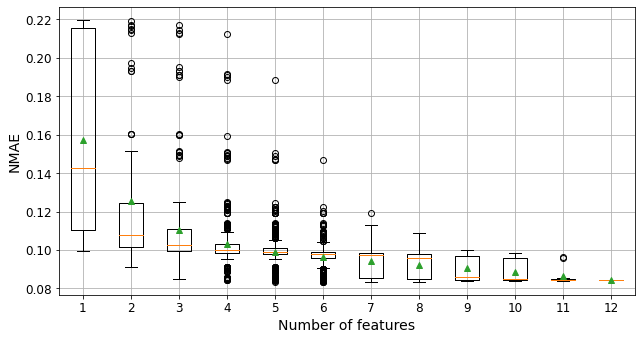

In [63]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1]) 
# Creating plot 
bp = ax.boxplot(NMAE_box,showmeans=True) 
font_size=14  
plt.xlabel('Number of features', fontsize=font_size)
plt.ylabel('NMAE', fontsize=font_size)
plt.tick_params(axis='both', which='major', labelsize=font_size-2)
plt.tick_params(axis='both', which='minor', labelsize=font_size-4)
#plt.tight_layout()
plt.grid()
plt.savefig(r"\kth course\network analytics\project\pic\3.2.png",dpi=300,bbox_inches='tight')
plt.show()

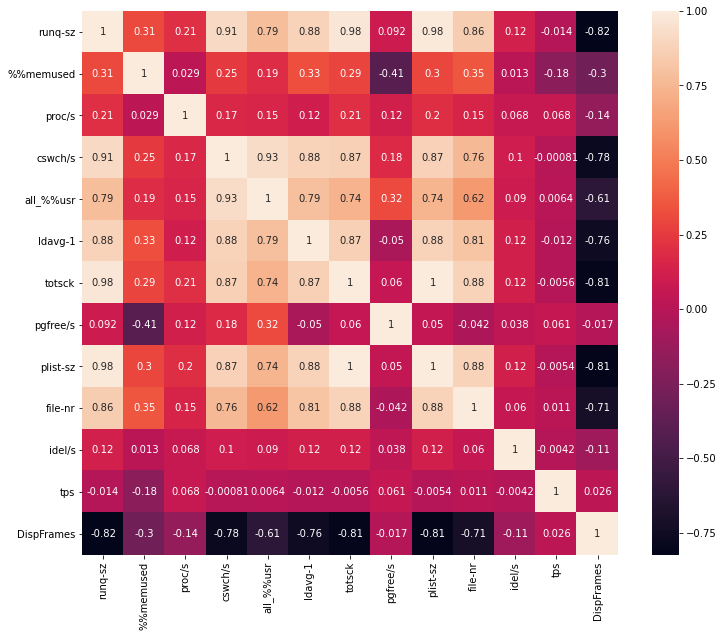

In [64]:
import seaborn as sns
corr=train.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True)
plt.savefig(r"\kth course\network analytics\project\pic\3.4.png",dpi=300,bbox_inches='tight')
plt.show()

In [65]:
corr['c'] = corr.DispFrames**2
corr_ = corr.sort_values('c')
corr_.DispFrames

pgfree/s     -0.016637
tps           0.025730
idel/s       -0.108629
proc/s       -0.141927
%%memused    -0.299374
all_%%usr    -0.606490
file-nr      -0.710448
ldavg-1      -0.757037
cswch/s      -0.780035
totsck       -0.806080
plist-sz     -0.810621
runq-sz      -0.823232
DispFrames    1.000000
Name: DispFrames, dtype: float64

In [66]:
feature_list=['runq-sz','plist-sz','totsck','cswch/s','ldavg-1','file-nr','all_%%usr','%%memused','proc/s','idel/s','tps','pgfree/s',]

In [67]:
NMAE_cor=[]
time_2=[]
for i in range(1, 13):
    tmp_result,timec = fit_linear_reg(X_train[feature_list[0:i]],Y_train,test[feature_list[0:i]],Y_test)
    NMAE_cor.append(tmp_result)
    time_2.append(timec)

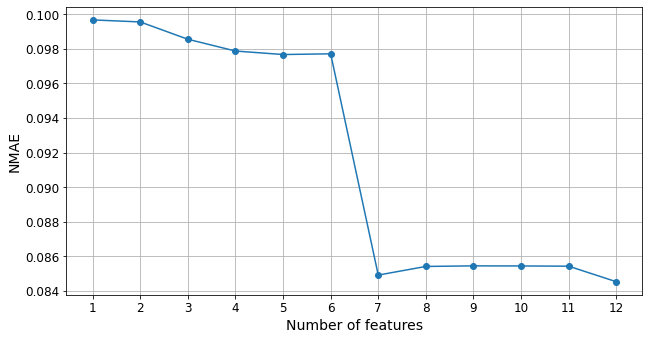

In [68]:
from matplotlib.pyplot import MultipleLocator
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
ax = fig.add_axes([0, 0, 1, 1]) 
my_xticks=list(range(1, 13))
plt.plot(my_xticks,NMAE_cor,marker='o')
plt.xlabel('Number of features', fontsize=font_size)
plt.ylabel('NMAE', fontsize=font_size)
plt.tick_params(axis='both', which='major', labelsize=font_size-2)
plt.tick_params(axis='both', which='minor', labelsize=font_size-4)

x_major_locator=MultipleLocator(1)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.grid()
plt.savefig(r"\kth course\network analytics\project\pic\3.3.png",dpi=300,bbox_inches='tight')

In [69]:
NMAE_min=[]
for i in range(1, 13):
     NMAE_min.append(df[df.numb_features==i]['NMAE'].min())

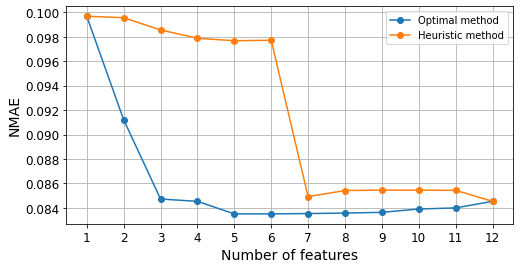

In [70]:
from matplotlib.pyplot import MultipleLocator
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
my_xticks=list(range(1, 13))
plt.plot(my_xticks, NMAE_min,marker='o',label='Optimal method')
plt.plot(my_xticks, NMAE_cor,marker='o',label='Heuristic method')
font_size=14  
plt.xlabel('Number of features', fontsize=font_size)
plt.ylabel('NMAE', fontsize=font_size)
plt.tick_params(axis='both', which='major', labelsize=font_size-2)
plt.tick_params(axis='both', which='minor', labelsize=font_size-4)
plt.legend()
x_major_locator=MultipleLocator(1)
ax=plt.gca()
plt.grid()
ax.xaxis.set_major_locator(x_major_locator)
plt.savefig(r"\kth course\network analytics\project\pic\3.5.png",dpi=300,bbox_inches='tight')
plt.show()

In [71]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

In [72]:
X_train_r = StandardScaler().fit_transform(X_train)
X_test = test.drop(columns = 'DispFrames', axis = 1)
X_test_r = StandardScaler().fit_transform(X_test)

In [73]:
NMAE_pca2=[]
time_5=[]
time_6=[]
npc = 12 # maximum number of principal components
pc = range(1,npc+1,1)

for i in pc:
    pca = PCA()
    time1=time.time()
    X_train_p = pca.fit_transform(X_train_r)[:,:i]
    X_test_p= pca.fit_transform(X_test_r)[:,:i]
    tmp_result,timec=fit_linear_reg(X_train_p,Y_train,X_test_p,Y_test)   #Store temp result
    time2=time.time()
    time_5.append(timec)
    NMAE_pca2.append(tmp_result)
    time_6.append(time2-time1)
time_6

[0.00493621826171875,
 0.003007650375366211,
 0.00497126579284668,
 0.0019936561584472656,
 0.001994609832763672,
 0.0019948482513427734,
 0.0019948482513427734,
 0.0029931068420410156,
 0.003055095672607422,
 0.003925800323486328,
 0.002991199493408203,
 0.0019948482513427734]

In [55]:
X_test_r.shape[0]

1080

In [75]:
time_3=[]
time_4=[]
NMAE_pca=[]

In [87]:
i=12
pca = PCA()
time1=time.time()
X_train_p = pca.fit_transform(X_train_r)[:,:i]
X_test_p= pca.fit_transform(X_test_r)[:,:i]
tmp_result,timec=fit_linear_reg(X_train_p,Y_train,X_test_p,Y_test)   #Store temp result
time2=time.time()
NMAE_pca.append(tmp_result)
time_3.append(timec)
time_4.append(time2-time1)
time_4

[0.004011392593383789,
 0.004954338073730469,
 0.005954742431640625,
 0.0043256282806396484,
 0.0045261383056640625,
 0.0038912296295166016,
 0.004420042037963867,
 0.004241228103637695,
 0.004984378814697266,
 0.004986763000488281,
 0.00499272346496582,
 0.003989458084106445]

In [47]:
NMAE_pca2

[0.10569473773408623,
 0.10488095118219957,
 0.10488355613961965,
 0.10479235489437311,
 0.10451859641140689,
 0.1035506800050587,
 0.1056572875734201,
 0.10474662598808636,
 0.10584153976678636,
 0.13475364564648962,
 0.13483459556027874,
 0.1348877961578499]

In [153]:
'''i=12
pca = PCA()
time1=time.time()
X_train_p = pca.fit_transform(X_train_r)[:,:i]
X_test_p= pca.fit_transform(X_test_r)[:,:i]
tmp_result,timec=fit_linear_reg(X_train_p,Y_train,X_test_p,Y_test)   #Store temp result
time2=time.time()
time_3.append(time2-time1)
NMAE_pca1.append(tmp_result)
#time_4.append(timec)
time_3
'''

[0.003988981246948242,
 0.003998279571533203,
 0.003987789154052734,
 0.003988981246948242,
 0.004985809326171875,
 0.003988504409790039,
 0.0049664974212646484,
 0.003954648971557617,
 0.004996776580810547,
 0.004988431930541992,
 0.004986763000488281,
 0.0069773197174072266]

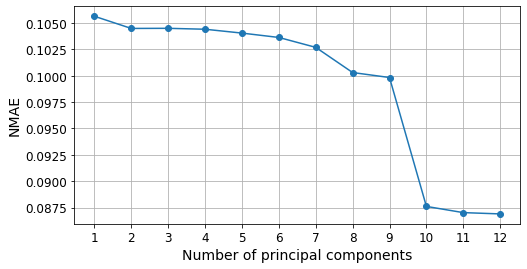

In [88]:
from matplotlib.pyplot import MultipleLocator
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
my_xticks=list(range(1, 13))
#plt.plot(my_xticks, NMAE_min,marker='o',label='Optimal method')
#plt.plot(my_xticks, NMAE_cor,marker='o',label='Heuristic method')
plt.plot(my_xticks, NMAE_pca,marker='o')
font_size=14  
plt.xlabel('Number of principal components', fontsize=font_size)
plt.ylabel('NMAE', fontsize=font_size)
plt.tick_params(axis='both', which='major', labelsize=font_size-2)
plt.tick_params(axis='both', which='minor', labelsize=font_size-4)
x_major_locator=MultipleLocator(1)
ax=plt.gca()
plt.grid()
ax.xaxis.set_major_locator(x_major_locator)
plt.savefig(r"\kth course\network analytics\project\pic\4.1.png",dpi=300,bbox_inches='tight')
plt.show()

In [180]:
time_3

[0.000827789306640625,
 0.0009970664978027344,
 0.0009968280792236328,
 0.0007431507110595703,
 0.0009968280792236328,
 0.0011403560638427734,
 0.0010027885437011719,
 0.0009987354278564453,
 0.00113677978515625,
 0.0013990402221679688,
 0.0006542205810546875,
 0.0003376007080078125]

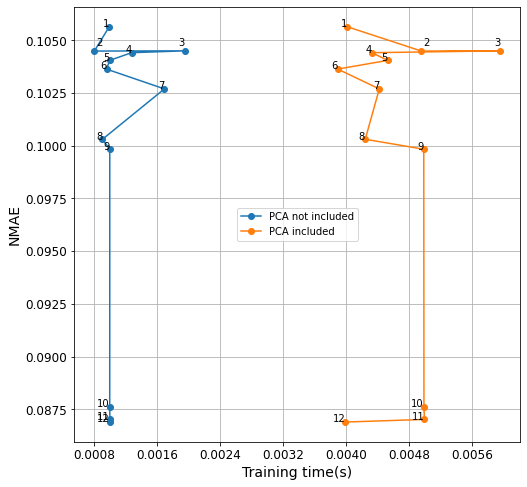

In [93]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
#my_xticks=list(range(1, 13))
#plt.plot(my_xticks, NMAE_min,marker='o',label='Optimal method')
#plt.plot(my_xticks, NMAE_cor,marker='o',label='Heuristic method')
plt.plot(time_3, NMAE_pca,marker='o',label='PCA not included')
plt.plot(time_4, NMAE_pca,marker='o',label='PCA included')
k=1
for x,y in zip(time_4, NMAE_pca):
    label = '%s' %k
    if k==2:
        axes.annotate(label,(x+0.0001,y+0.00025), ha='right')
    elif k==3:
        axes.annotate(label,(x,y+0.00025), ha='right')
    else:
        axes.annotate(label,(x,y), ha='right')
    k=k+1
k=1
for x,y in zip(time_3, NMAE_pca):
    label = '%s' %k
    if k==2:
        axes.annotate(label,(x+0.0001,y+0.00025), ha='right')
    elif k==3:
        axes.annotate(label,(x,y+0.00025), ha='right')
    else:
        axes.annotate(label,(x,y), ha='right')
    k=k+1
font_size=14  
plt.xlabel('Training time(s)', fontsize=font_size)
plt.ylabel('NMAE', fontsize=font_size)
plt.tick_params(axis='both', which='major', labelsize=font_size-2)
plt.tick_params(axis='both', which='minor', labelsize=font_size-4)
x_major_locator=MultipleLocator(0.0008)
plt.legend()
ax=plt.gca()
plt.grid()
ax.xaxis.set_major_locator(x_major_locator)
plt.savefig(r"\kth course\network analytics\project\pic\4.2.png",dpi=300,bbox_inches='tight')
plt.show()

In [195]:
xy

(0.003988504409790039, 0.09443875783101038)

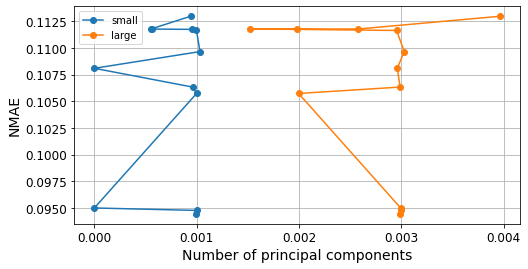

In [161]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
my_xticks=list(range(1, 13))
#plt.plot(my_xticks, NMAE_min,marker='o',label='Optimal method')
#plt.plot(my_xticks, NMAE_cor,marker='o',label='Heuristic method')
plt.plot(time_5, NMAE_pca2,marker='o',label='small')
plt.plot(time_6, NMAE_pca2,marker='o',label='large')
font_size=14  
plt.xlabel('Number of principal components', fontsize=font_size)
plt.ylabel('NMAE', fontsize=font_size)
plt.tick_params(axis='both', which='major', labelsize=font_size-2)
plt.tick_params(axis='both', which='minor', labelsize=font_size-4)
x_major_locator=MultipleLocator(0.001)
plt.legend()
ax=plt.gca()
plt.grid()
ax.xaxis.set_major_locator(x_major_locator)
plt.savefig(r"\kth course\network analytics\project\pic\4.1.png",dpi=300,bbox_inches='tight')
plt.show()

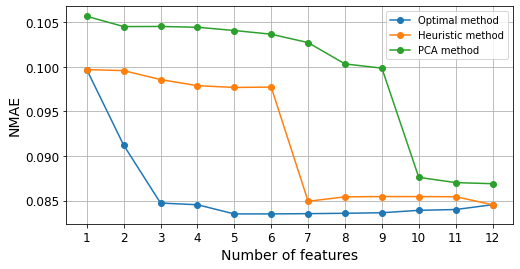

In [90]:
from matplotlib.pyplot import MultipleLocator
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
my_xticks=list(range(1, 13))
plt.plot(my_xticks, NMAE_min,marker='o',label='Optimal method')
plt.plot(my_xticks, NMAE_cor,marker='o',label='Heuristic method')
plt.plot(my_xticks, NMAE_pca,marker='o',label='PCA method')
font_size=14  
plt.xlabel('Number of features', fontsize=font_size)
plt.ylabel('NMAE', fontsize=font_size)
plt.tick_params(axis='both', which='major', labelsize=font_size-2)
plt.tick_params(axis='both', which='minor', labelsize=font_size-4)
plt.legend()
x_major_locator=MultipleLocator(1)
ax=plt.gca()
plt.grid()
ax.xaxis.set_major_locator(x_major_locator)
plt.savefig(r"\kth course\network analytics\project\pic\4.3.png",dpi=300,bbox_inches='tight')
plt.show()

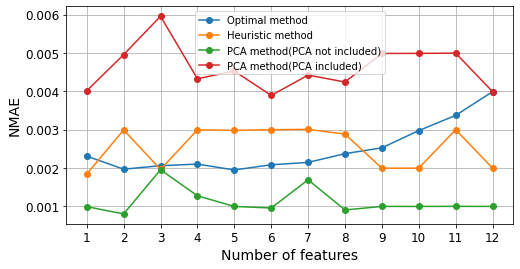

In [91]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
my_xticks=list(range(1, 13))
plt.plot(my_xticks, time_1,marker='o',label='Optimal method')
plt.plot(my_xticks, time_2,marker='o',label='Heuristic method')
plt.plot(my_xticks, time_3,marker='o',label='PCA method(PCA not included)')
plt.plot(my_xticks, time_4,marker='o',label='PCA method(PCA included)')
font_size=14  
plt.xlabel('Number of features', fontsize=font_size)
plt.ylabel('Training time', fontsize=font_size)
plt.tick_params(axis='both', which='major', labelsize=font_size-2)
plt.tick_params(axis='both', which='minor', labelsize=font_size-4)
plt.legend()
x_major_locator=MultipleLocator(1)
ax=plt.gca()
plt.grid()
ax.xaxis.set_major_locator(x_major_locator)
plt.savefig(r"\kth course\network analytics\project\pic\4.4.png",dpi=300,bbox_inches='tight')
plt.show()

In [65]:
df[df.numb_features==1]['training time']

0     0.002958
8     0.001996
6     0.001994
5     0.002991
3     0.000997
9     0.001995
4     0.002992
1     0.001997
2     0.003990
11    0.000997
7     0.000997
10    0.000997
Name: training time, dtype: float64